# Simulação de Monte Carlo

**Método de Monte Carlo**, que remete aos cassinos, é uma abordagem metodológica baseada em amostragens aleatórias visando a computação de quantidades estatísticas.

Tal método é conveniente por tornar desnecessário escrever as equações diferenciais que descrevem o comportamento de sistemas tipicamente complexos. 

Vamos aqui utilizar o método de Monte Carlo para ilustrar a Lei dos Grandes Números.

Procederemos o seguinte exercício:

## Exercício 1 (LGN):

Produziremos 1000 amostras aleatórias i.i.d. com 15 observações cada $(n = 15)$ distribuídas uniformimente no intervalo $[0,5]$, ou $U(0, 5)$. Em seguida, construiremos um histograma com as médias amostrais, repetindo o exercício para $n = 30, 50, 100$ e 1000.

Lembrando que, para uma variável $X\sim U(a,b)$, se $\frac{X-a}{b-a} = U(0,1)$, então $X = a + (b-a)U(0,1)$.

### Primeiramente, apenas para n=15

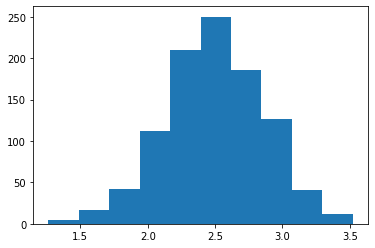

In [1]:
# import numpy as np                      # Carrega o numpy e o chama de np 
# import matplotlib.pyplot as plt         # Carrega o pacote de gráficos matplotlib e o chama de plt
# Vamos carregas os módulos separados para melhor visualização do código
from matplotlib.pyplot import figure, plot, bar, draw, hist, legend, draw , subplots
from numpy.random import randn, rand, standard_t, normal, uniform
from numpy import sqrt, arange, mean, std
from numpy.linalg import inv

a=0; b=5;                               # Parâmetros da distribuição que queremos amostrar
n = [15,30,50,100,1000];                # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Total de amostras de tamanho n
u = rand(sample,n[0]);                  # Constrói i observações para as amostras aleatórias em que a=0 e b=1 com 1000 observações cada a partir de uma uniform no intervalo [0,1)
y = a+(b-a)*u;                          # Ajusta a amostra para os valores de a e b desejados e transpõe a matriz para lidar com o comando 
Y = mean(y,axis=1);                     # Computa as médias de y para cada uma das 1000 amostras
hist(Y, bins = 10);                     # Plota o histograma com 20 barras.


In [2]:
p=u[1,0:14]
p

array([0.13491895, 0.55751612, 0.39017476, 0.27036039, 0.38314793,
       0.99978065, 0.83174815, 0.20996985, 0.34049275, 0.90451222,
       0.8392481 , 0.89073741, 0.87833498, 0.91168787])

### Agora, para todas as amostras

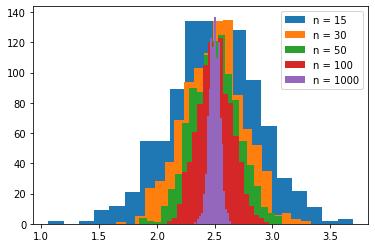

In [3]:
a=0; b=5;                                 # Valores de a e b conforme exercício
n = [15,30,50,100,1000];                  # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                              # Amostra
for j in range(len(n)):                   # Loop para gerar histogramas para cada valor de n
    u = rand(sample,n[j]);                # Constrói i observações para as amostras aleatórias em que a=0 e b=1 com 1000 observações cada a partir de uma uniform no intervalo [0,1)
    y = a + (b-a)*u;                      # Ajusta a amostra para os valores de a e b desejados e transpõe a matriz para lidar com o comando 
    Y = mean(y,axis=1);                   # Transpõe o vetor com as médias das colunas da matriz y
    hist(Y, bins = 20, label=['n = '+ str(n[j])]);                     # Plota o histograma com 20 barras.               
    legend()

A lei fraca dos grandes implica que o estimador converge em probabilidade para a média populacional e a variância se reduz à medida que $n$ cresce. É exatamente isso o que podemos observar nas figuras.

## Exercício 2:

Vamos agora produzir 1000 amostras aleatórias com 5 observações cada $(n = 5)$ a partir de uma distribuição $t$-student com 3 graus de liberdade. Em seguida, faremos um histograma com as médias amostrais centralizadas, isto é, 

$$\sqrt{n}\Bigg(\frac{E(x)-\bar{x}}{\sqrt{\text{Var}(x)}}\Bigg),$$
em que $\bar{x}=0$, incluindo no gráfico a densidade de uma normal padrão para amostras de tamanho $n = 10, 50, 100, 1000$ e $10000$. Objetivo é visualizar graficamente o Teorema Central do Limite.

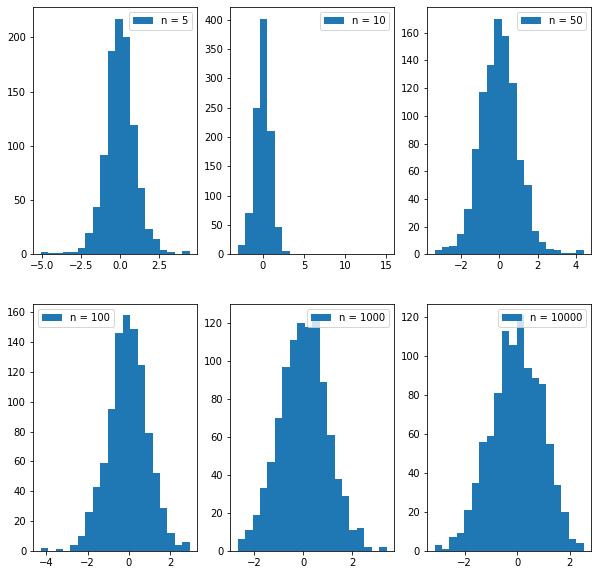

In [4]:
x_bar = 0;                              # Verdadeira média populacional.
n=[5,10,50,100,1000,10000];             # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Quantidade de amostras
df=3;                                   # Graus de liberdade
s = sqrt(df/(df-2));                    # df/(df-2): variância da t.

fig = figure(figsize=(10,10))           # Cria o objeto fig que recebe as informações do gráfico  

for j in range(len(n)):                                # Loop para gerar histogramas para cada valor de n
    ax = fig.add_subplot(2, 3, j+1)                    # Cria o objeto ax que recebe as informações do subgráfico j+1
    x  = standard_t(df,(sample,n[j]));                 # Amostra a partir de uma t-student com df graus de liberdade n[j] obs.
    y  = sqrt(n[j])*(mean(x,axis=1) - x_bar)/s         # Função normalizada com sqrt(n) fator de convergência
    ax.hist(y, bins = 20, label=['n = '+ str(n[j])]);  # Plota o histograma com 20 barras.               
    legend()


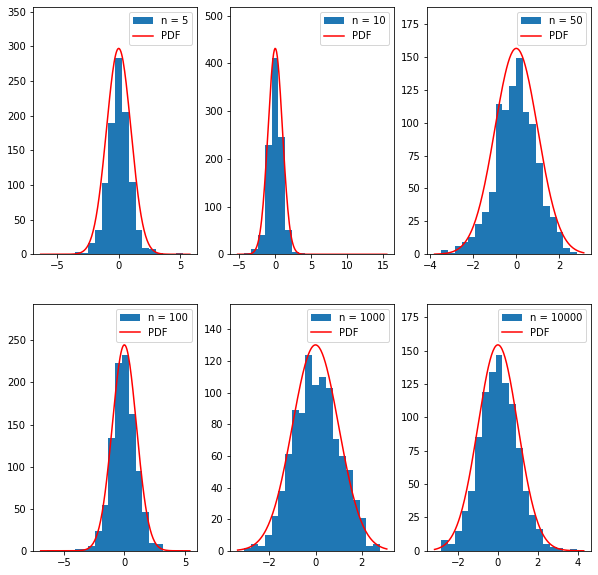

In [5]:
import scipy.stats as stats

x_bar = 0;                              # Verdadeira média populacional.
n=[5,10,50,100,1000,10000];             # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Quantidade de amostras
df=3;
s = sqrt(df/(df-2));

fig = figure(figsize=(10,10))           # Cria o objeto fig que recebe as informações do gráfico  

for j in range(len(n)):                                # Loop para gerar histogramas para cada valor de n
    ax   = fig.add_subplot(2, 3, j+1)                  # Cria o objeto ax que recebe as informações do subgráfico j+1
    x    = standard_t(df,(sample,n[j]));               # Amostra a partir de uma t-student com df graus de liberdade
    y    = sqrt(n[j])*(mean(x,axis=1) - x_bar)/s       # Função normalizada com sqrt(n) fator de convergência
    ax.hist(y, bins = 20, label=['n = '+ str(n[j])]);  # Plota o histograma com 20 barras.                         
    xlim = ax.get_xlim()                               # Obtem os valores do gráfico na dimensão horizontal
    ylim = ax.get_ylim()                               # Obtem os valores na dimensão vertical
    pdfx = np.linspace(xlim[0], xlim[1], 200)          # Cria um grid com 200 pontos para o eixo x
    pdfy = stats.norm.pdf(pdfx)                        # Gera a pdf de uma normal para o grid acima
    pdfy = pdfy / pdfy.max() * ylim[1]                 # Normaliza a pdf para que consigamos coloca-la num mesmo gráfico que a distribuição de y
    plot(pdfx, pdfy, 'r-', label='PDF')                # Plota a pdf sobre o subgráfico
    ax.set_ylim((ylim[0], 1.2 * ylim[1]))              
    legend()
    draw()

Pelo teorema central do limite , à medida que $n$ cresce, o termo  converge para uma $$\sqrt{n}\Bigg(\frac{\bar{x}-E(x)}{\sqrt{\text{Var}(x)}}\Bigg),$$ normal padrão. É exatamente o que mostram os histogramas acima mostram.

Mas e se, ao invés de $\sqrt{n}$, o fator de convergência for $n^{\frac{3}{4}}$?

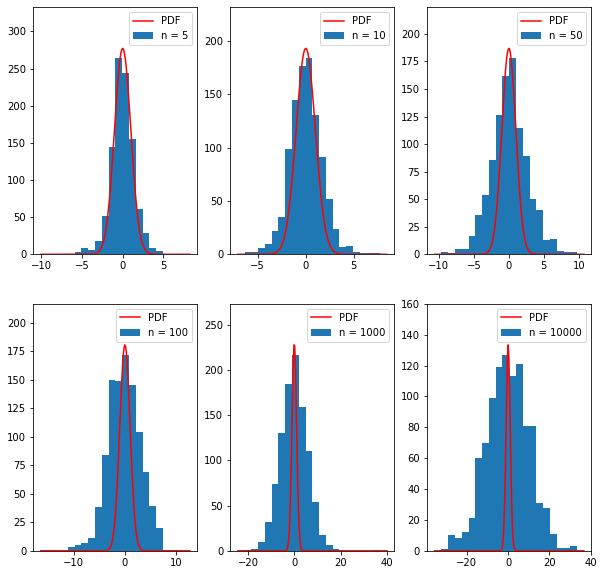

In [17]:
x_bar = 0;                              # Verdadeira média populacional.
n=[5,10,50,100,1000,10000];             # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Quantidade de amostras
df=3;
s = sqrt(df/(df-2));

fig = figure(figsize=(10,10))                          # Cria um objeto "figura", onde serão plotados os gráficos

for j in range(len(n)):                                # Loop para gerar histogramas para cada valor de n
    ax = fig.add_subplot(2, 3, j+1)                    # Cria o objeto ax que recebe as informações do subgráfico j+1
    x  = standard_t(df,(sample,n[j]));                 # Amostra a partir de uma t-student com df graus de liberdade
    y  = n[j]**.75*(mean(x,axis=1) - x_bar)/s          # Função normalizada com sqrt(n) fator de convergência
    ax.hist(y, bins = 20, label=['n = '+ str(n[j])]);  # Plota o histograma com 20 barras.                         
    xlim = ax.get_xlim()                               # Obtem os valores do gráfico na dimensão horizontal
    ylim = ax.get_ylim()                               # Obtem os valores na dimensão vertical
    pdfx = np.linspace(xlim[0], xlim[1], 200)          # Cria um grid com 200 pontos para o eixo x
    pdfy = stats.norm.pdf(pdfx)                        # Gera a pdf de uma normal para o grid acima
    pdfy = pdfy / pdfy.max() * ylim[1]                 # Normaliza a pdf para que consigamos coloca-la num mesmo gráfico que a distribuição de y
    plot(pdfx, pdfy, 'r-', label='PDF')                # Plota a pdf sobre o subgráfico
    ax.set_ylim((ylim[0], 1.2 * ylim[1]))              
    legend()
    draw()

ou, talvez, $n^{\frac{1}{4}}$?

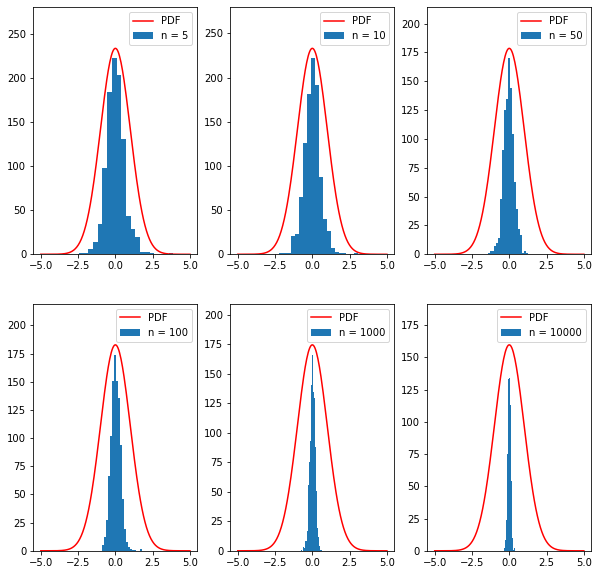

In [18]:
x_bar = 0;                              # Verdadeira média populacional.
n=[5,10,50,100,1000,10000];             # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Quantidade de amostras
df=3;
s = sqrt(df/(df-2));

fig = figure(figsize=(10,10))                          # Cria um objeto "figura", onde serão plotados os gráficos
for j in range(len(n)):                                # Loop para gerar histogramas para cada valor de n
    ax = fig.add_subplot(2, 3, j+1)                    # Cria o objeto ax que recebe as informações do subgráfico j+1
    x  = standard_t(df,(sample,n[j]));                 # Amostra a partir de uma t-student com df graus de liberdade
    y  = n[j]**.25*(mean(x,axis=1) - x_bar)/s          # Função normalizada com sqrt(n) fator de convergência
    ax.hist(y, bins = 20, label=['n = '+ str(n[j])]);  # Plota o histograma com 20 barras.                         
    xlim = ax.get_xlim()                               # Obtem os valores do gráfico na dimensão horizontal
    ylim = ax.get_ylim()                               # Obtem os valores na dimensão vertical
    pdfx = np.linspace(-5, 5, 200)                     # Cria um grid com 200 pontos para o eixo x
    pdfy = stats.norm.pdf(pdfx)                        # Gera a pdf de uma normal para o grid acima
    pdfy = pdfy / pdfy.max() * ylim[1]                 # Normaliza a pdf para que consigamos coloca-la num mesmo gráfico que a distribuição de y
    plot(pdfx, pdfy, 'r-', label='PDF')                # Plota a pdf sobre o subgráfico
    ax.set_ylim((ylim[0], 1.2 * ylim[1]))              
    legend()
    draw()

Talvez com $n^{100}$?

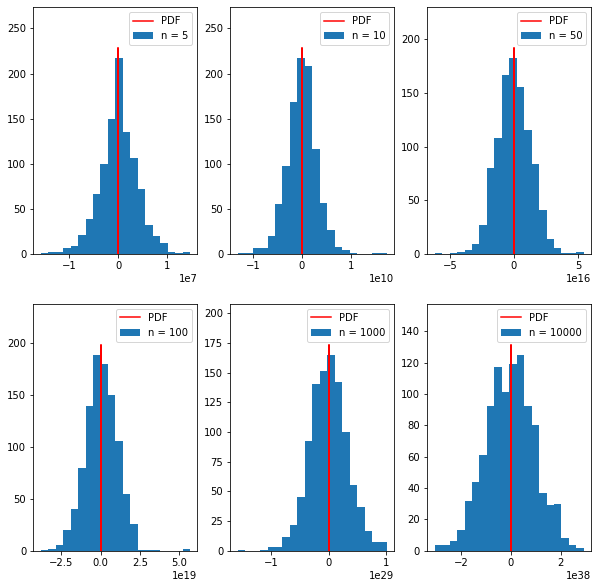

In [19]:
x_bar = 0;                              # Verdadeira média populacional.
n=[5,10,50,100,1000,10000];             # Quantidade de observações em cada amostra para fins de comparação
sample=1000;                            # Quantidade de amostras
df=3;
s = sqrt(df/(df-2));

fig = figure(figsize=(10,10))                          # Cria um objeto "figura", onde serão plotados os gráficos
for j in range(len(n)):                                # Loop para gerar histogramas para cada valor de n
    ax = fig.add_subplot(2, 3, j+1)                    # Cria o objeto ax que recebe as informações do subgráfico j+1
    x  = standard_t(df,(sample,n[j]));                 # Amostra a partir de uma t-student com df graus de liberdade
    y  = n[j]**10*(mean(x,axis=1) - x_bar)/s           # Função normalizada com sqrt(n) fator de convergência
    ax.hist(y, bins = 20, label=['n = '+ str(n[j])]);  # Plota o histograma com 20 barras.                         
    xlim = ax.get_xlim()                               # Obtem os valores do gráfico na dimensão horizontal
    ylim = ax.get_ylim()                               # Obtem os valores na dimensão vertical
    pdfx = np.linspace(-5, 5, 200)                     # Cria um grid com 200 pontos para o eixo x
    pdfy = stats.norm.pdf(pdfx)                        # Gera a pdf de uma normal para o grid acima
    pdfy = pdfy / pdfy.max() * ylim[1]                 # Normaliza a pdf para que consigamos coloca-la num mesmo gráfico que a distribuição de y
    plot(pdfx, pdfy, 'r-', label='PDF')                # Plota a pdf sobre o subgráfico
    ax.set_ylim((ylim[0], 1.2 * ylim[1]))              
    legend()
    draw()

## Modelo Linear no Python

Suponha que estejamos interessados em entender os determinantes da variável $y_i$ para o indivíduo $i$ por meio do seguinte modelo:

**ML1 (Modelo Linear)**

\begin{gather*}
    y_i = \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_K x_{iK} + \epsilon_i 
\end{gather*}

em que os objetos são:

1. $y_i:{(1\times 1)}$: variável de interesse (variável dependente, variável explicada);
1. $x_i:{(K\times 1)}=(x_{i1},\cdots,x_{iK})'$ regressores, potencialmente aleatórios;
1. $\epsilon_i:{(1\times 1)}$: parte não observável de $y_i$ (distúrbio).
1. Amostra: $(y_i,x_i)_{i=1}^n$ é uma coleção de $n$ observações que o econometrista tem acesso para estimar o parâmetro de interesse $\beta_k$, $k = 1, 2, \cdots,K $.



Vamos empilhar as observações para as $K$ variáveis do indivíduo $i$ no vetor $x_i$ e definir um vetor de parâmetros, $\beta$.

$$\underbrace{{x_i}}_{(K \times 1)} = \begin{bmatrix}
x_{i1}\\ 
x_{i2}\\ 
\vdots \\ 
x_{iK}
\end{bmatrix},  \quad
\underbrace{{\beta}}_{(K \times 1)} = \begin{bmatrix}
\beta_1\\ 
\beta_2\\ 
\vdots \\ 
\beta_K
\end{bmatrix}$$
tal que o produto interno dos vetores seja dado por:
$$ x_i^\prime \beta = \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_K x_{iK}. $$

Com isso, podemos escrever a equação para $y_i$ como:
$$ y_i =  x_i^\prime \beta + \epsilon_i, \quad \forall i= 1,2,\cdots, n $$

Se empilharmos os dados para todos os $n$ indivíduos, obtemos:


$$\underbrace{{y}}_{(n \times 1)} = \begin{bmatrix}
y_{1}\\ 
y_{2}\\ 
\vdots \\ 
y_{n}
\end{bmatrix}, \quad 
\underbrace{{\epsilon}}_{(n \times 1)} = \begin{bmatrix}
\epsilon_1\\ 
\epsilon_2\\ 
\vdots \\ 
\epsilon_n
\end{bmatrix}, \quad
\underbrace{{X}}_{(n \times K)} = \begin{bmatrix}
x_{1}^\prime\\ 
x_{2}^\prime\\ 
\vdots \\ 
x_{n}^\prime
\end{bmatrix} = 
\begin{bmatrix}
x_{11} &  \cdots & x_{1K}\\ 
x_{21} & \cdots & x_{2K} \\ 
\vdots & \ddots  & \vdots \\ 
x_{n1} & \cdots  & x_{nK}
\end{bmatrix},$$

de modo que o modelo na forma matricial se torna:

$$y = X\beta + \epsilon$$

**ML2 (Exogeneidade estrita)**: A média condicional dos erros é assumida zero, para todo $i$:

$$E(\epsilon_i|x_{1}, x_{2}\cdots, x_{K}) = 0, \;\; i= 1, 2, \cdots, n$$
    
$$E(\epsilon_i|X) = 0, \forall i \quad \Rightarrow \quad  \begin{bmatrix}
E(\epsilon_1|X)\\ 
\vdots \\
E(\epsilon_n|X)
\end{bmatrix} = \underbrace{0}_{(n\times 1)} $$ 


**ML3 (Posto pleno)**: Por hipótese, assumimos que $X$ tem posto pleno, $K$. Assim, há ausência de multicolinearidade.

Tal hipótese é requerida, pois, caso contrário, $\text{det}(X'X)=0$, implicado que $\frac{1}{\text{det}(X'X)}$ não é definido.


Sob **ML1** a **ML3**, o estimador de OLS é dado por:
$$\beta_{ols} = E(x_ix_i^\prime)^{-1} E(x_iy_i)$$

Como a formulação acima usa quantidades populacionais, precisamos de estimativas de $E(x_ix_i^\prime)^{-1}$ e $E(x_iy_i)$ para termos uma estimativa amostral de $\beta$.
A contra partida amostral de $E(x_ix_i^\prime)^{-1}$  é  $\Bigg(\frac{1}{n}\sum_{i=1}^{n}x_i x_i'\Bigg)^{-1}.$ Analogamente, a contra partida amostral de $E(x_iy_i)$ é simplesmente a quantidade $\Bigg(\frac{1}{n}\sum_{i=1}^{n}x_i y_i\Bigg)$. Assim, o estimador OLS para $\beta$ é simplesmente:
$$\hat{\beta}_{ols}=\Bigg(\frac{1}{n}\sum_{i=1}^{n}x_i x_i'\Bigg)^{-1}\Bigg(\frac{1}{n}\sum_{i=1}^{n}x_i y_i\Bigg) = (X'X)^{-1}(X'y)$$

Ademais, sabemos que, dada a variância assimptótica do estimador de OLS para $\beta$, sob variância esférica (**ML4**) o estimador da variância é dado por:

$$\widehat{\text{Var}(\beta_{ols}|X)} \equiv s^2(X^\prime X)^{-1},  $$
em que     $$ s^2\equiv \frac{SSR}{n-K}= \frac{e^\prime e}{n-K} \quad \quad (n>K) $$


## Consistência do OLS
### Estimando o OLS com dados sintéticos

Vamos assumir um modelo populacional dado por:

$$y_i = 1.5 + 0.5 x_{i,1} + 0.5 x_{i,2} + \epsilon_i$$

em que $x_{i,1} \sim N(0,5)$, $x_{i,2} \sim N(0,7)$ e $\epsilon_i \sim U(-1,1)$, em que $E(\epsilon_ix_{i,1})=E(\epsilon_ix_{i,2})=0$. Ou seja, $\beta=(1.5, 0.5, 0,5)'$. 


Suponha que tenhamos 1000 amostras, cada uma com $n=10$ observações. Queremos mostrar que o estimador de OLS é não enviesado.

## Implementação no Python:

In [24]:
n=10
ei = uniform(-1,1,(n,1));  
ei

array([[ 0.43090142],
       [ 0.93518068],
       [ 0.90432846],
       [ 0.15189486],
       [-0.11380105],
       [-0.0224831 ],
       [-0.66234833],
       [ 0.55551271],
       [-0.1853333 ],
       [-0.46082037]])

In [25]:

sample=1000;                             # Quantidade de amostras  
n=10;                                    # Observações por amostras
xi1_bar = 0;                             # Média da explicativa 1
xi2_bar = 0;                             # Média da explicativa 2
st_x1   = sqrt(5);                       # Desvio-padrão de x_1
st_x2   = sqrt(7);                       # Desvio-padrão de x_2
k       = 3;                             # Número de variáveis explicativas (incluindo a constante)  

###
Beta = np.zeros((k,sample));             # Pré-alocando memória
AVAR = np.zeros((k,k,sample));           # Pré-alocando memória
S2   = np.zeros((1,sample));             # Pré-alocando memória
tsta = np.zeros((k,sample));             # Pré-alocando memória

for i in range(sample):
    ei          = uniform(-1,1,(n,1));           # Amostrando choques aleatórios: numpy.random.uniform(a,b,tamanho)
    x1          = normal(xi1_bar,st_x1,(n,1));   # Construindo a variável x_i,1 numpy.random.normal(Média, dp, tamanho)  
    x2          = normal(xi2_bar,st_x2,(n,1));                    # Construindo a variável x_i, 
    x0          = np.ones((n,1));                                 # Cria um vetor de 1s (10x1)                  
    x           = np.concatenate((x0,x1,x2),axis=1);              # Concatena ordenando x0,x1 e, por último x2
    y           = 1.5 + 0.5*x1 + 0.5*x2 + ei;                     # constrói y para a amostra i
    Betai       = inv(x.T @ x) @ (x.T @ y);                       # Estimativa de beta para a amostra i 
    Beta[:,i]   = Betai.T                                         # Transpoe Betai para alocar na matriz com todas as amostras
    e_hat       = y - x @ Betai;                                  # resíduo da regressão i
    S2[0,i]     = (e_hat.T @ e_hat) / (n-k);                      # estimativa de s2 para a amostra i
    AVAR[:,:,i] = S2[0,i] * inv(x.T @ x);                         # Calcula AVAR com variância esférica 
    dp          = sqrt(np.diag(AVAR[:,:,i]));                     # Desvio-padrão de beta
    tsta[:,i]   = Beta[:,i]/dp                                    # Estatística t
    
beta0 = mean(Beta[0,:])                   # Média de b_0 em 1000 amostras
beta1 = mean(Beta[1,:])                   # Média de b_1 em 1000 amostras
beta2 = mean(Beta[2,:])                   # Média de b_2 em 1000 amostras
Avar  = mean(AVAR,axis=2)                 # AVAR médio em 1000 amostras
S2    = mean(S2)                          # S2 médio em 1000 amostras
tstat = mean(tsta,axis=1)                 # Estatística t média em 1000 amostras
print('\n==============================================================================')
print('Constante:                  ' + str(beta0))
print('Variável dependente 1:      ' + str(beta1))
print('Variável dependente 2:      ' + str(beta2))
print('Variância média do resíduo: ' + str(S2))
print('Desvio padrão de B:         ' + str(sqrt(np.diag(Avar))))
print('Estatísticas t:             ' + str(tstat))
print('Viés b_0:                   ' + str(beta0-1.5))
print('Viés b_1:                   ' + str(beta1-0.5))
print('Viés b_2:                   ' + str(beta2-0.5))


Constante:                  1.5006509092191167
Variável dependente 1:      0.5009494336021582
Variável dependente 2:      0.5019588895123858
Variância média do resíduo: 0.3333833217670731
Desvio padrão de B:         [0.21129406 0.10654272 0.08923206]
Estatísticas t:             [7.8291525  5.56695635 6.85640142]
Viés b_0:                   0.0006509092191167021
Viés b_1:                   0.0009494336021581562
Viés b_2:                   0.001958889512385764


In [28]:
Betai[0:3].T

array([[1.02309038, 0.61508703, 0.57241214]])

## Inconsistência do OLS:
Suponha agora que o modelo populacional seja dado por: 

$$y_i = 1.5 + 0.5 x_{i,1} + \epsilon_i$$

em que $x_{i,1} \sim N(0,5)$ e $\epsilon_i = u_i + 0.3 x_{i,1}$, em que $u_i \sim U(-1,1)$.

Note que $E(\epsilon_ix_{i,1})\neq 0$, ou seja, **ML2** foi violada.


In [32]:

sample  = 1000;                          # Quantidade de amostras  
n       = 10;                            # Observações por amostras
xi1_bar = 0;                             # Média da explicativa 
st_x1   = sqrt(5);                       # Desvio-padrão de x_1

xi1  = normal(xi1_bar,st_x1,(n,sample)); # Construindo a variável x_i,1: numpy.random.normal(média,dp,tamanho)
ui   = uniform(-1,1,(n,sample));         # Amostrando choques aleatórios: numpy.random.uniform(a,b,tamanho)
k    = 2;                                # Número de variáveis explicativas (incluindo a constante)  
Ones = np.ones((n,sample));              # Pré-alocando memória
x = np.array([Ones[:,i],xi1[:,i]]); 
x = x.T
x

array([[ 1.        ,  3.47623116],
       [ 1.        , -0.62946602],
       [ 1.        , -1.9380852 ],
       [ 1.        , -1.53492264],
       [ 1.        , -1.70942088],
       [ 1.        ,  0.2231783 ],
       [ 1.        ,  2.86284613],
       [ 1.        ,  2.82523065],
       [ 1.        ,  3.79718843],
       [ 1.        , -3.73653343]])

In [33]:

sample  = 1000;                          # Quantidade de amostras  
n       = 10;                            # Observações por amostras
xi1_bar = 0;                             # Média da explicativa 
st_x1   = sqrt(5);                       # Desvio-padrão de x_1

xi1  = normal(xi1_bar,st_x1,(n,sample)); # Construindo a variável x_i,1: numpy.random.normal(média,dp,tamanho)
ui   = uniform(-1,1,(n,sample));         # Amostrando choques aleatórios: numpy.random.uniform(a,b,tamanho)
k    = 2;                                # Número de variáveis explicativas (incluindo a constante)  
Ones = np.ones((n,sample));              # Pré-alocando memória
Beta = np.zeros((k,sample));             # Pré-alocando memória
AVAR = np.zeros((k,k,sample));           # Pré-alocando memória
S2   = np.zeros((1,sample));             # Pré-alocando memória
tsta = np.zeros((k,sample));             # Pré-alocando memória

for i in range(sample):
    x = np.array([Ones[:,i],xi1[:,i]]);                   # constrói x para a amostra i
    x = x.T;                                              # Transposta de x.   
    e_i         = ui[:,i] + .3*xi1[:,i];                  # constrói o erro dependente de x[:,i]
    y           = 1.5 + 0.5*xi1[:,i]+ e_i;                # constrói y para a amostra i
    Beta[:,i]   = inv(x.T @ x) @ (x.T @ y);               # Estimativa de beta para a amostra i
    e_hat       = y-x @ Beta[:,i];                        # resíduo da regressão i
    S2[0,i]     = (e_hat.T @ e_hat) / (n-k);              # estimativa de s2 para a amostra i
    AVAR[:,:,i] = S2[0,i]*inv(x.T @ x);
    dp          = sqrt(np.diag(AVAR[:,:,i]));
    tsta[:,i]   = Beta[:,i]/dp
    
beta0 = mean(Beta[0,:])
beta1 = mean(Beta[1,:])
Avar  = mean(AVAR,axis=2)
S2    = mean(S2)
tstat = mean(tsta,axis=1)
print('\n==============================================================================')
print('Constante:                  ' + str(beta0))
print('Variável dependente 1:      ' + str(beta1))
print('Viés:                       ' + str(beta1-0.5))
print('Variância média do resíduo: ' + str(S2))
print('Desvio padrão de B:         ' + str(sqrt(np.diag(Avar))))
print('Estatísticas t:             ' + str(tstat))



Constante:                  1.504512186066047
Variável dependente 1:      0.7983454432047238
Viés:                       0.2983454432047238
Variância média do resíduo: 0.3380633303480584
Desvio padrão de B:         [0.19628735 0.09829946]
Estatísticas t:             [8.26811707 9.64235488]


In [ ]:
x = np.concatenate((Ones[:,i],xi1[:,i]),axis=0);                   # constrói x para a amostra i
teste=np.ones((10,1))


## Aumentar a amostra reduz o viés?

In [34]:

sample=1000;                          # Quantidade de amostras  
n=1000;                               # Observações por amostras
xi1_bar = 0;                          # Média da explicativa 
st_x1   = sqrt(5);                    # Desvio-padrão de x_1

xi1=normal(xi1_bar,st_x1,(n,sample)); # Construindo a variável x_i,1 numpy.random.normal(loc=0.0, scale=1.0, size=None)¶
ui =uniform(-1,1,(n,sample));         # Amostrando choques aleatórios
k=2;                                  # Número de variáveis explicativas (incluindo a constante)  
Ones=np.ones((n,sample));
Beta=np.zeros((k,sample));            # Pré-alocando memória
AVAR=np.zeros((k,k,sample));          # Pré-alocando memória
S2  =np.zeros((1,sample));            # Pré-alocando memória
tsta=np.zeros((k,sample));            # Pré-alocando memória
ei  =np.zeros((1,sample));            # Pré-alocando memória

for i in range(sample):
    x = np.array([Ones[:,i],xi1[:,i]]);                    # constrói x para a amostra i
    x = x.T;
    e_i         = ui[:,i] + .3*xi1[:,i];                  # constrói o erro dependente de x[:,i]
    y           = 1.5 + 0.5*xi1[:,i]+ e_i;                # constrói y para a amostra i
    Beta[:,i]   = inv(x.T @ x) @ (x.T @ y);               # Estimativa de beta para a amostra i
    e_hat       = y-x @ Beta[:,i];                        # resíduo da regressão i
    S2[0,i]     = (e_hat.T @ e_hat)/(n-k);                # estimativa de s2 para a amostra i
    AVAR[:,:,i] = S2[0,i]*inv(x.T @ x);
    dp          = sqrt(np.diag(AVAR[:,:,i]));
    tsta[:,i]   = Beta[:,i]/dp
    
beta0=mean(Beta[0,:])
beta1=mean(Beta[1,:])
Avar =mean(AVAR,axis=2)
S2   =mean(S2)
tstat=mean(tsta,axis=1)
print('\n==============================================================================')
print('Constante:                  ' + str(beta0))
print('Variável dependente 1:      ' + str(beta1))
print('Viés:                       ' + str(beta1-0.5))
print('Variância média do resíduo: ' + str(S2))
print('Desvio padrão de B:         ' + str(sqrt(np.diag(Avar))))
print('Estatísticas t:             ' + str(tstat))



Constante:                  1.500800229460895
Variável dependente 1:      0.8000081071478434
Viés:                       0.30000810714784343
Variância média do resíduo: 0.33284702862079213
Desvio padrão de B:         [0.01825349 0.00816546]
Estatísticas t:             [82.24265311 98.07852466]


## Heterocedasticidade:
Se a matriz de variância-covariância dos erros não for esférica, uma alternativa é estimar a variância por meio do estimador de White (1980) $\text{Avar}(\boldsymbol{b})$ dado por: 

$$\widehat{\text{Avar}(\boldsymbol{b})} = \Bigg(\frac{1}{n}\sum_{i=1}^n x_i x_i'\Bigg)^{-1}\widehat{\boldsymbol{S}} \Bigg(\frac{1}{n}\sum_{i=1}^n x_i x_i'\Bigg)^{-1}$$
em que  $\widehat{\boldsymbol{S}}=\frac{1}{n}\sum_{i=1}^n x_ix_i'e_i^2$, que é robusta à dependência do segundo momento dos erros às observações em $X$. Note que aqui precisamos resolver um somatório de $i=1, \cdots, n$, requerendo a função for-loop.

Alternativamente, podemos estimar $\widehat{\boldsymbol{S}}$ utilizando a formulação matricial:

$$\widehat{\text{Var}(\boldsymbol{b}|X)} =(X'X)^{-1} (X'\boldsymbol{\hat{D}}X)(X'X)^{-1},$$
em que

$$ \boldsymbol{\hat{D}}\equiv \text{diag}\left(\begin{bmatrix}
e_1^2\\ 
\vdots\\ 
e_n^2
\end{bmatrix} \right) = \begin{bmatrix}
e_1^2 & \cdots  &0 \\ 
\vdots & \ddots & \vdots\\ 
0 & \cdots & e_n^2
\end{bmatrix},$$


## Importando dados reais:

In [35]:
#from pandas import DataFrame                       # Carrega o pacote pandas e importa o subpacote DataFrame
#import statsmodels.api as sm                       # Carrega o subpacote api dentro do pacote statsmodels
#data = sm.datasets.statecrime.load_pandas()        # Seleciona o dataframe contendo a base de dados de crime
import pandas as pd                                 # Carrega o pacote pandas e o chama de pd
dados = pd.read_excel('CollegeDistance.xls')        # Cria a variável "dados" que contém os dados da planilha
dados.head()                                        # Mostra os nomes das variáveis e algumas observações

,female,black,hispanic,bytest,dadcoll,momcoll,ownhome,urban,cue80,stwmfg80,dist,tuition,ed,incomehi
0,0,0,0,39.15,1,0,1,1,6.2,8.09,0.2,0.88915,12,1
1,1,0,0,48.87,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
2,0,0,0,48.74,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
3,0,1,0,40.40,0,0,1,1,6.2,8.09,0.2,0.88915,12,0
4,1,0,0,40.48,0,0,0,1,5.6,8.09,0.4,0.88915,13,0


In [36]:
dados_1   = dados["hispanic"]                       # Coleta a coluna de título "hispanic" e salva com nome "dados_1"
variaveis = dados[["dist","ed"]]                    # Coleta "dist" e "ed"
variaveis.head()                                    # Mostra o conteúdo da variável "variáveis"

,dist,ed
0,0.2,12
1,0.2,12
2,0.2,12
3,0.2,12
4,0.4,13


### Montando as matrizes

In [46]:
X = np.array(variaveis["dist"])              # Coleta "dist" e salva no array X
y = np.array(variaveis["ed"]) 
n = len(X)                                   # len(X) pega o número de linhas de X. len(X[0]) pega o número de colunas 


In [48]:
X = np.array(variaveis["dist"])              # Coleta "dist" e salva no array X
y = np.array(variaveis["ed"])                # Coleta "ed" e salva no array y
k = 2                                        # Número de variáveis
n = len(X)                                   # len(X) pega o número de linhas de X. len(X[0]) pega o número de colunas 
#X = np.reshape(X,(n,1))                      # Converte o array 1-D em n x 1  
X = X[...,None]                      # Converte o array 1-D em n x 1        
y = np.reshape(y,(n,1)) 
X = np.hstack([np.ones((n,1)),X])            # Concatena vetor de 1s com X e atualiza X para ter 1s e 'dist' 
print(X)

[[1.  0.2]
 [1.  0.2]
 [1.  0.2]
 ...
 [1.  0.8]
 [1.  0.8]
 [1.  0.8]]


### Rodando a regressão

In [50]:
Beta   = inv(X.T @ X) @ (X.T @ y)           # computa o beta via OLS
e_hat  = y-X @ Beta;                        # resíduo da regressão 
s2     = (e_hat.T @ e_hat)/(n-k);           # estimativa de s2 
AVAR   = s2*inv(X.T @ X);                   # Estimando a Variância esférica
dp     = sqrt(np.diag(AVAR));               # Computa o desvio padrão
tsta   = Beta.T/dp                          # Computa a estatística t.

print('\n==============================================================================')
print('Constante:                  ' + str(Beta[0]))
print('Variável dependente 1:      ' + str(Beta[1]))
print('Variância  do resíduo:      ' + str(s2))
print('Desvio padrão de B:         ' + str(sqrt(np.diag(AVAR))))
print('Estatísticas t:             ' + str(tsta))


Constante:                  [13.95585611]
Variável dependente 1:      [-0.07337271]
Variância  do resíduo:      [[3.266831]]
Desvio padrão de B:         [0.03772413 0.0137498 ]
Estatísticas t:             [[369.94511767  -5.33627352]]


### Calculando a variância robusta (White):

#### Método 1:

In [51]:
ei = e_hat[:,0]         ## Para utilizar o comando diag, precisamos converter e_hat em 1-D.
ei

array([-1.94118157, -1.94118157, -1.94118157, ...,  3.10284205,
        2.10284205, -0.89715795])

In [52]:
D = np.diag(ei)**2      ## e diagonalizamos a "matriz 1-D" do vetor e_hat, elevamos ao quadrado cada elemento
D

array([[3.7681859 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.7681859 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.7681859 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 9.62762879, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 4.42194469,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.80489239]])

In [53]:
D       = np.zeros((n,n))                   # Alternativamente, pré-alocamos uma matriz de zeros(n,n)
for i in range(n):
    D[i,i] = e_hat[i,0]**2                  # Na diagonal desta matriz, computamos os resíduos^2

D    
    

array([[3.7681859 , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 3.7681859 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 3.7681859 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 9.62762879, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 4.42194469,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.80489239]])

In [54]:
White1    = inv(X.T @ X) @ X.T @ D @ X @ inv(X.T @ X)      #/(n/(n-k)) : correção ad hoc implementada em alguns softwares
se_robust = sqrt(np.diag(White1));
se_robust

array([0.03780122, 0.01342989])

In [ ]:
White1

#### Método 2:


In [ ]:
## Teste:
xi  = X[0,:];      # Selecionamos o valor das covariadas para o 0
## Mas isso vai requerer converter xi em (n,1)

In [55]:

S = np.zeros((k,k));                                   # pré-alocamos uma matriz de zeros(k,k), aqui chamada S.
for i in range(n):
    xi  = X[i,:];                                      # Selecionamos o valor das covariadas para o i
    xi  = xi[...,None]                                 # Transformamos o vetor (k) 1-D em (1 x K)
    ei2 = e_hat[i,0]**2;                               # Computamos o quadrado dos resíduos
    S   = S + (xi @ xi.T)*ei2 ;                        # Somamos S o valor de ei2*(xi@ xi.T)
    
White2  = inv(X.T @ X) @ S @ inv(X.T @ X)              ##/(n/(n-k)) #: correção ad hoc de MacKinnon e White (1985)
se_rob  = sqrt(np.diag(White2));
print(se_rob)


[0.03780122 0.01342989]


In [56]:
t_rob   = Beta.T/se_rob;
print(t_rob)

[[369.19062688  -5.46338841]]


## Grau de Ajuste

O grau de ajuste (não centrado) da regressão é dado por:

$$\frac{\hat{y}'\hat{y}}{y'y}\equiv R^2 = 1 - \frac{e'e}{y'y}  $$

Retirando a média:

$$R^2\equiv 1 - \frac{\sum_{i=1}^{n}e_i^2}{\sum_{i=1}^n(y_i-\bar{y})^2} = 1 - \frac{\hat{\sigma}^2}{\hat{\sigma}_y^2}$$
Problema:
${\hat{\sigma}^2}\text{ e } {\hat{\sigma}_y^2}$ são estimativas enviesadas de  ${\sigma^2}$ e ${{\sigma}_y^2}$. 

Por isso, pode ser útil utilizar o $R_2$ ajustado
$$R^2_{adj}\equiv 1 - \frac{\hat{\sigma}^2/(n-K)}{\hat{\sigma}_y^2/(n-1)} = 1 - \frac{s^2}{\hat{\sigma}_y^2/(n-1)}$$


In [ ]:
ybar = mean(y);
R2=1-(e_hat.T @ e_hat) / sum((y - ybar)*(y - ybar))                  ## Poderíamos usar /np.var(y)
R2

In [ ]:
ybar
R2_adj=1-((e_hat.T @ e_hat)/(n-k))/(sum((y - ybar)*(y - ybar))/(n-1)) ## Poderíamos usar /(np.var(y)*n/(n-1))
R2_adj

In [ ]:
R2_adj=1-((e_hat.T @ e_hat)/(n-k))/(np.var(y)*n/(n-1))                ## Poderíamos usar /(np.var(y)*n/(n-1))
R2_adj

## Estamos fazendo as contas corretamente?

Vamos conferir nossos cálculos utilizando o pacote econométrico statsmodels

In [ ]:
import matplotlib.pyplot as plt                                         ## Carrega o pacote de gráfico
import statsmodels.api as sm                                            ## Carrega o statsmodels como sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std   ## 

model = sm.OLS(y, X)                                                    ## Função que estima a regressão
results = model.fit(cov_type='HC0')                                     ## Função que define, entre outras opções, a matriz de erros
## Nota: HC0: White. HC1: Mackinnon e White (1985). HC2 MacKinnon e White (1985) alternativo
## Para o caso sem heterocedasticidade, ou usar model.fit()  ou model.fit(cov_type='nonrobust')    
print(results.summary())                                                ## Imprime os resultados

## Adicionando explicativas:

Vamos agora considerar o modelo:
$$ED_i = \beta_0 + \beta_1 Dist_i + \beta_2 Incomehi_i + \beta_3 Female_i + \beta_4 Black_i + \epsilon_i,$$

em que:
1. $ED_i   $: anos completos de educação;
1. $Dist_i$ : distância para a faculdade mais próxima; 
1. $Incomehi_i$: 1 = Renda familiar > \$25,000 a.a.;  0 = c.c;
1. $Female_i$: 1 = Pessoa $i$ é mulher; 0 = homem;
1. $Black_i$: 1 = negro; 0 = c.c.;


In [ ]:
dados.head()

In [ ]:
listanomes=["dist","incomehi","female","black"]
X = np.array(dados[listanomes])
y = np.array(dados["ed"])


In [ ]:
X

In [ ]:
k=4

In [ ]:
X = np.reshape(X,(n,k)) 
y = np.reshape(y,(n,1)) 
X = np.hstack([np.ones((n,1)),X])

In [ ]:
k=5

In [ ]:
Beta   = inv(X.T @ X) @ (X.T @ y)           # Estimação OLS de beta
e_hat  = y-X @ Beta;                        # resíduo da regressão i
s2     = (e_hat.T @ e_hat)/(n-k);           # estimativa de s2 para a amostra i
AVAR   = s2*inv(X.T @ X);                   # Estimando a Variância esférica
dp     = sqrt(np.diag(AVAR));               # Computa o desvio padrão
tsta   = Beta.T/dp                          # Computa a estatística t.
D      = np.diag(e_hat[:,0])**2             # Diagonaliza o vetor de resíduos e eleva cada ítem ao quadrado
White1 = inv(X.T @ X) @ X.T @ D @ X @ inv(X.T @ X)  # Matriz Robusta de White (1981)  
se_rob = sqrt(np.diag(White1));             # Desvios-padrão dos regressores
t_rob  = Beta.T/se_rob;                     # t-robusto

In [ ]:
print('\n===============================================================================================================')
print('         Coef                S.E.                 t-Stat                 S.E. Rob               t-Rob')

print('B[0]: ' , Beta[0] , '   ' , dp[0] , '   ' , tsta[0,0] , '   ' , str(se_rob[0]) , '   ' , t_rob[0,0])
print('B[1]: ' , Beta[1] , '   ' , dp[1] , '   ' , tsta[0,1] , '   ' , str(se_rob[1]) , '   ' , t_rob[0,1])
print('B[2]: ' , Beta[2] , '   ' , dp[2] , '   ' , tsta[0,2] , '   ' , str(se_rob[2]) , '   ' , t_rob[0,2])
print('B[3]: ' , Beta[3] , '   ' , dp[3] , '   ' , tsta[0,3] , '   ' , str(se_rob[3]) , '   ' , t_rob[0,3])
print('B[4]: ' , Beta[4] , '   ' , dp[4] , '   ' , tsta[0,4] , '   ' , str(se_rob[4]) , '   ' , t_rob[0,4])
print('Var(u):' , str(s2[0]))

In [ ]:
## Organizando as variáveis para o print
np.set_printoptions(precision=4)
dp=dp[...,None]
tsta=tsta[...,None]
se_rob=se_rob[...,None]
t_rob=t_rob[...,None]


In [ ]:
listanomes=["Const","dist","incomehi","female","black"]                                      # Adiciona a constante na lista de variáveis


In [ ]:
print('\n============================================================================')

print('               Coef        S.E.       t-Stat     S.E. Rob     t-Rob')
for i in range(k):
    tuplaprint=(Beta[i],dp[i],tsta[0,i],se_rob[i],t_rob[0,i])                                # cria uma tupla com os resultados
    print("%10s" % listanomes[i]," %8.4f    %8.4f    %8.4f    %8.4f    %8.4f" % tuplaprint)  # imprime cada coeficiente

print('\n---------------------------------------------------------------------------')
print('Var(u):' , str(s2[0]))


## Testes de hipóteses


**1)** Seria ED uma função decrescente e côncava de Dist? 

Para testar isso, modificamos o modelo:
$$ED_i = \beta_0 + \beta_1 Dist_i + \beta_2 Dist_i^2 + \beta_3 Incomehi_i + \beta_4 Female_i + \beta_5 Black_i + \epsilon_i,$$

Precisamos, então, alterar o vetor X. Como ele agora tem a constante, Dist se encontra na coluna 1 (2). Assim, X passa a ser:

In [ ]:
X  

In [ ]:
X1  = X[:,0:2];

In [ ]:
X11 = X[:,1]**2;

In [ ]:
X11 = X11[...,None];

In [ ]:
X1  = np.concatenate((X1,X11),axis=1)

In [ ]:
X1

In [ ]:
X2 = X[:,2:]

In [ ]:
X2

In [ ]:
X2 = np.concatenate((X1,X2),axis=1)

In [ ]:
X2

In [ ]:
listanomes=["Const","dist","dist^2","incomehi","female","black"]                                      # Adiciona a constante na lista de variáveis


In [ ]:
X=X2;
k=6;

In [ ]:
Beta   = inv(X.T @ X) @ (X.T @ y)             # Estimativa OLS para Beta
e_hat  = y-X @ Beta;                          # resíduo da regressão i
s2     = (e_hat.T @ e_hat)/(n-k);             # estimativa de s2 para a amostra i
AVAR   = s2*inv(X.T @ X);                     # Estimando a Variância esférica
dp     = sqrt(np.diag(AVAR));                 # Computa o desvio padrão
tsta   = Beta.T/dp                            # Computa a estatística t.
#D      = np.array(e_hat)                      # Para utilizar o comando diag, precisamos converter e_hat em 1-D
#D      = np.matrix(D)                         # Para isso, utilizamos o comando matrix, que converte os dados em matriz de formatos arbitrários
#D      = np.diag(D.A1)**2                     # e extraímos a "matriz 1-D" do vetor e_hat. Em seguida, elevamos ao quadrado cada elemento
D      = np.diag(e_hat[:,0])**2             # Diagonaliza o vetor de resíduos e eleva cada ítem ao quadrado
White1 = inv(X.T @ X) @ X.T @ D @ X @ inv(X.T @ X)  # Matriz Robusta de White
se_rob = sqrt(np.diag(White1));               # SE Roustos
t_rob  = Beta.T/se_rob;

## Organizando as variáveis para o print
np.set_printoptions(precision=4)
dp=dp[...,None]
tsta=tsta[...,None]
se_rob=se_rob[...,None]
t_rob=t_rob[...,None]

R2=1-((e_hat.T@e_hat)/n)/np.var(y)
R2
R2_adj=1-((e_hat.T@e_hat)/(n-k))/(np.var(y)*n/(n-1))               
R2_adj

print('\n============================================================================')
print('R2:    ' , R2[0],    '    Graus de liberdade   ', n-k)
print('R2_adj:' , R2_adj[0],'    Número de Observações', n )
print('s^2:   ' , s2[0],    '    Variável dependente  ', " Ed")
print('\n---------------------------------------------------------------------------')
print('               Coef        S.E.       t-Stat     S.E. Rob     t-Rob')
for i in range(k):
    tuplaprint=(Beta[i],dp[i],tsta[0,i],se_rob[i],t_rob[0,i])                                # cria uma tupla com os resultados
    print("%10s" % listanomes[i]," %8.4f    %8.4f    %8.4f    %8.4f    %8.4f" % tuplaprint)  # imprime cada coeficiente

print('\n---------------------------------------------------------------------------')


Para implementar o teste, recorreremos ao teste de Wald.
Lembrando que a estatística de Wald é dada por:

$$W \equiv \Big(R\hat{\beta}-q \Big)'\Big( R \widehat{\text{Avar}(\boldsymbol{\hat{\beta}}}) R' \Big)^{-1} \Big (R\hat{\beta}-q \Big)\underset{d}{\rightarrow} \chi^2(r) ,$$

em que, no caso de restrições lineares, 

$$H_0: \underbrace{R}_{(r \times K)} \underbrace{\hat{\beta}}_{(K \times 1)} = \underbrace{q}_{(r \times 1)}$$

Para restrições não lineares, temos que:

Seja ${c(\hat{\beta})}: (r\times 1)$ uma função não-linear do estimador de $\beta$, em que 
$c(\hat{\beta}):\mathbb{R}^K\to \mathbb{R}^r$. 
O problema geral do teste envolve uma função não linear dos coeficientes da regressão:
$$ H_0:  c(\hat{\beta}) = q,$$
em que $c(\hat{\beta}) = q$ é um conjunto de restrições.

$$  \Big(c(\hat{\beta})-c(\beta)\Big)'\Bigg(C({\hat{\beta}})\widehat{\text{Avar}(\boldsymbol{\hat{\beta}}}) C({\hat{\beta}})'\Bigg)^{-1}\Big(c(\hat{\beta})-c(\beta)\Big) {\sim} \chi^2(r),$$

em que:
$$ C_{(k \times r)}{(\hat\beta)} = \begin{bmatrix}
\frac{\partial c_1}{\partial\beta_1} & \cdots & \frac{\partial c_r}{\partial\beta_1}\\ 
\vdots & \ddots & \vdots \\ 
\frac{\partial c_1}{ \partial \beta_k} & \cdots  & \frac{\partial c_r}{\partial \beta_k}
\end{bmatrix}$$

### Testando restrição linear:
Voltando ao nosso problema, pelas condições de primeira ordem, queremos testar se $\beta_1 + 2\beta_2 Dist<0$ e $2\beta_2<0$. Ou seja, temos as seguintes matrizes:

$$R= \begin{bmatrix}
0 & 1  & 2  Dist & 0 & 0\\ 
0 & 0  & 2 & 0 & 0
\end{bmatrix} \quad \text{e} \quad q = \begin{bmatrix}
0\\ 
0
\end{bmatrix}$$


In [ ]:
Dist = X[:,2]                                                          # Salva Dist numa matriz separada

R = np.array([[0, 1, 2*mean(Dist), 0, 0, 0] , [0, 0, 2, 0, 0, 0]]);    # Restrição Linear
q = [[0], [0]];                                                        # Restrição testada 


#Estatística Wald:
wald_est = np.transpose((R@Beta - q))@(inv(R@White1@R.T))@(R@Beta - q) # Estatística de Wald
print(wald_est[0])

Na tabela da Qui-quadrado, vemos que o valor crítico a 5% com dois graus de liberdade é 5.99, o que nos leva a rejeitar a hipótese nula de que ED é uma função decrescente e côncava de Dist.

### Testando restrição não linear
Queremos agora testar a hipótese de que $\beta_4 \beta_5=0$, ou seja, não há iteração entre as variáveis. Além disso, queremos testar a restrição não linear dada por $\beta_1^2 = 3 \beta_3^2 + 4$. 

Assim, temos as seguintes matrizes:
$$c(\hat{\beta}) =\begin{bmatrix}
\beta_4\beta_5\\ 
\beta_1^2 -3\beta_3^2 
\end{bmatrix},  \quad
q=\begin{bmatrix}
0\\ 
4
\end{bmatrix} \quad \text{e} \quad C({\hat{\beta}})=\begin{bmatrix}
0 & 0 & 0 & 0 & \beta_5 & \beta_4\\ 
0 & 2\beta_1  & 0 & -6\beta_3 & 0 & 0
\end{bmatrix}$$

In [ ]:
c_beta = np.array([[Beta[4,0]*Beta[5,0]], [Beta[1,0]**2 - 3*Beta[3,0]**2 ]]);   # Restrições não-lineares
q = [[0], [0]];                                                                 # Restrição testada 

#C = Matriz de derivadas de g com relação à b 
C_beta = np.array([[0, 0, 0,  0, Beta[5,0], Beta[4,0]], [0, 2*Beta[1,0], 0, -6*Beta[3,0], 0,  0]]);
                
wald_est = np.transpose((c_beta - q))@(inv(C_beta@White1@C_beta.T))@(c_beta - q) #Estatística de Wald Não linear:
print(wald_est[0])

Na tabela da Qui-quadrado, vemos que o valor crítico a 5% com dois graus de liberdade é 5.99, o que nos leva a rejeitar a hipótese nula.